# **Installing - importing libraries**

In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
from math import sqrt
from sklearn.metrics import mean_squared_error

# **Importing Data**

In [2]:
import datetime as dt

file = 'coin_Bitcoin.csv'
df_raw = pd.read_csv(file,sep=',',engine='c')
df_raw

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [3]:
df = df_raw[['Close']]
df.index = pd.to_datetime(df_raw['Date']).dt.date
df.index = pd.to_datetime(df.index)
df

,Close
Date,
2013-04-29,144.539993
2013-04-30,139.000000
2013-05-01,116.989998
2013-05-02,105.209999
2013-05-03,97.750000
...,...
2021-07-02,33897.048590
2021-07-03,34668.548402
2021-07-04,35287.779766


# Resampling (day ,week, month, quarter, year)

In [4]:
# Resampling to daily frequency
df_day = df.resample('D').mean()

# Resampling to weekly frequency
df_week = df.resample('W').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to quarterly frequency
df_quarter = df.resample('Q-DEC').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

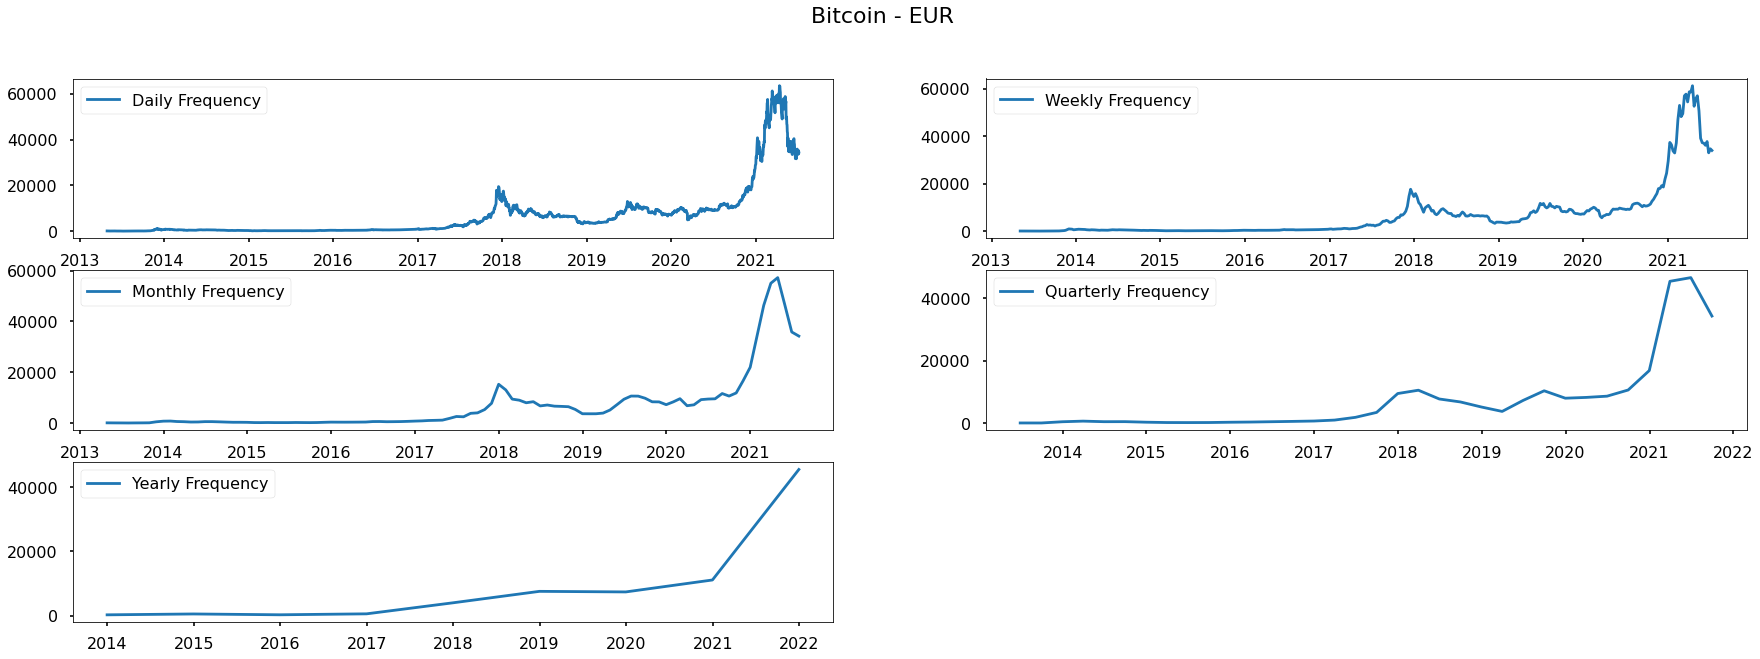

In [5]:
# PLOTS
fig = plt.figure(figsize=[30, 10])
plt.suptitle('Bitcoin - EUR', fontsize=22)

plt.subplot(321)
plt.plot(df_day.Close, '-', label='Daily Frequency')
plt.legend()

plt.subplot(322)
plt.plot(df_week.Close, '-', label='Weekly Frequency')
plt.legend()

plt.subplot(323)
plt.plot(df_month.Close, '-', label='Monthly Frequency')
plt.legend()

plt.subplot(324)
plt.plot(df_quarter.Close, '-', label='Quarterly Frequency')
plt.legend()

plt.subplot(325)
plt.plot(df_year.Close, '-', label='Yearly Frequency')
plt.legend()

plt.show()

In [6]:
plt.figure(figsize=[15,7])

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

# **Stationarity check and STL decomposition of the series**

In [7]:
def plotseasonal(res, axes, title ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    axes[0].set_title(title, fontsize = 25, fontweight ='bold')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

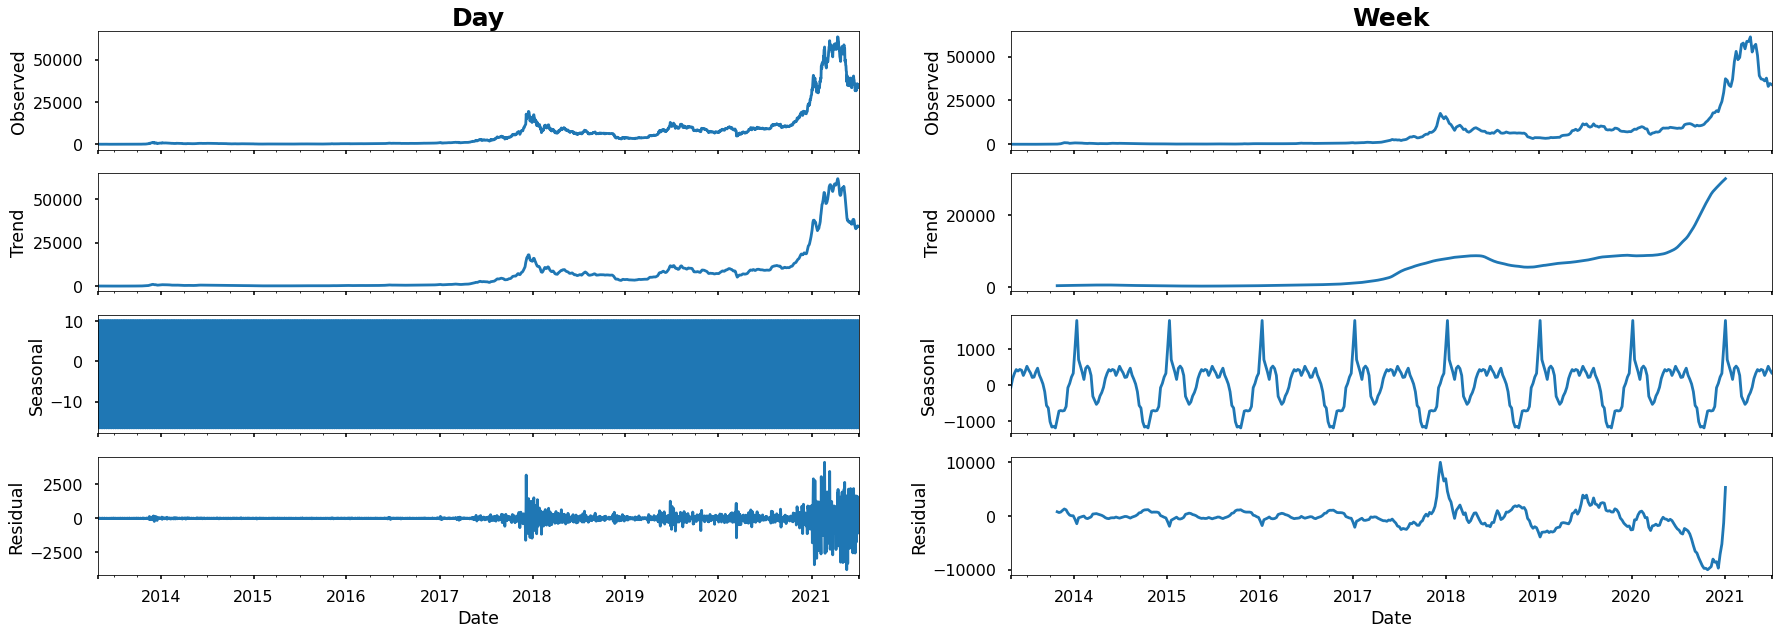

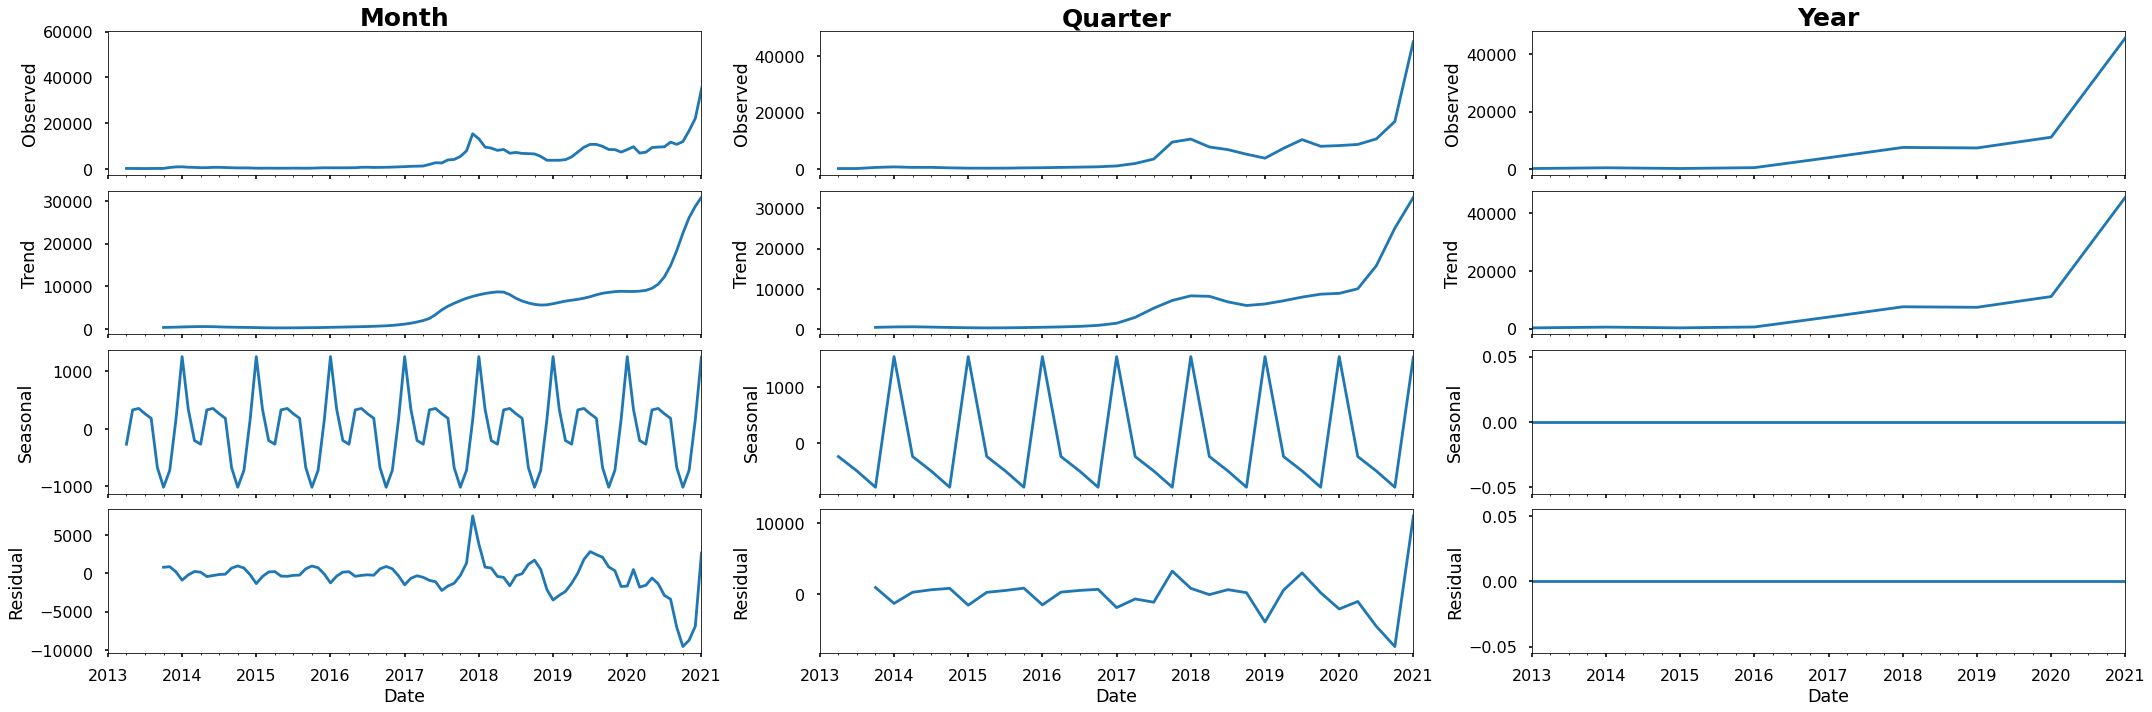

In [8]:
res_day = sm.tsa.seasonal_decompose(df_day.Close)
res_week = sm.tsa.seasonal_decompose(df_week.Close)
res_month = sm.tsa.seasonal_decompose(df_month.Close)
res_quarter = sm.tsa.seasonal_decompose(df_quarter.Close)
res_year = sm.tsa.seasonal_decompose(df_year.Close)

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(30,10))
plotseasonal(res_day, axes[:,0],'Day')
plotseasonal(res_week, axes[:,1],'Week')


fig, axes = plt.subplots(ncols=3, nrows=4, sharex=True, figsize=(30,10))
plotseasonal(res_month, axes[:,0],'Month')
plotseasonal(res_quarter, axes[:,1],'Quarter')
plotseasonal(res_year, axes[:,2],'Year')

plt.tight_layout()
plt.show()

## Dickey Fuller Test

In [9]:
print("Dickey–Fuller test (Original - Day): p=%f" % sm.tsa.stattools.adfuller(df_day.Close)[1])
print("Dickey–Fuller test (Original - Week): p=%f" % sm.tsa.stattools.adfuller(df_week.Close)[1])
print("Dickey–Fuller test (Original - Month): p=%f" % sm.tsa.stattools.adfuller(df_month.Close)[1])
print("Dickey–Fuller test (Original - Quarter): p=%f" % sm.tsa.stattools.adfuller(df_quarter.Close)[1])
print("Dickey–Fuller test (Original - Year): p=%f" % sm.tsa.stattools.adfuller(df_year.Close)[1])

Dickey–Fuller test (Original - Day): p=0.819911
Dickey–Fuller test (Original - Week): p=0.984068
Dickey–Fuller test (Original - Month): p=0.999028
Dickey–Fuller test (Original - Quarter): p=0.998702
Dickey–Fuller test (Original - Year): p=1.000000


The data is not stationary so we try to make them stationary by applying different transformations.
In order to decide if the data is stationary, dickey fuller test must give a p-value <= 0.05.

# **Box-Cox Transformation**

In [10]:
df_day['Close_box'], lmbda = stats.boxcox(df_day.Close)
df_week['Close_box'], lmbda = stats.boxcox(df_week.Close)
df_month['Close_box'], lmbda = stats.boxcox(df_month.Close)
df_quarter['Close_box'], lmbda = stats.boxcox(df_quarter.Close)
df_year['Close_box'], lmbda = stats.boxcox(df_year.Close)

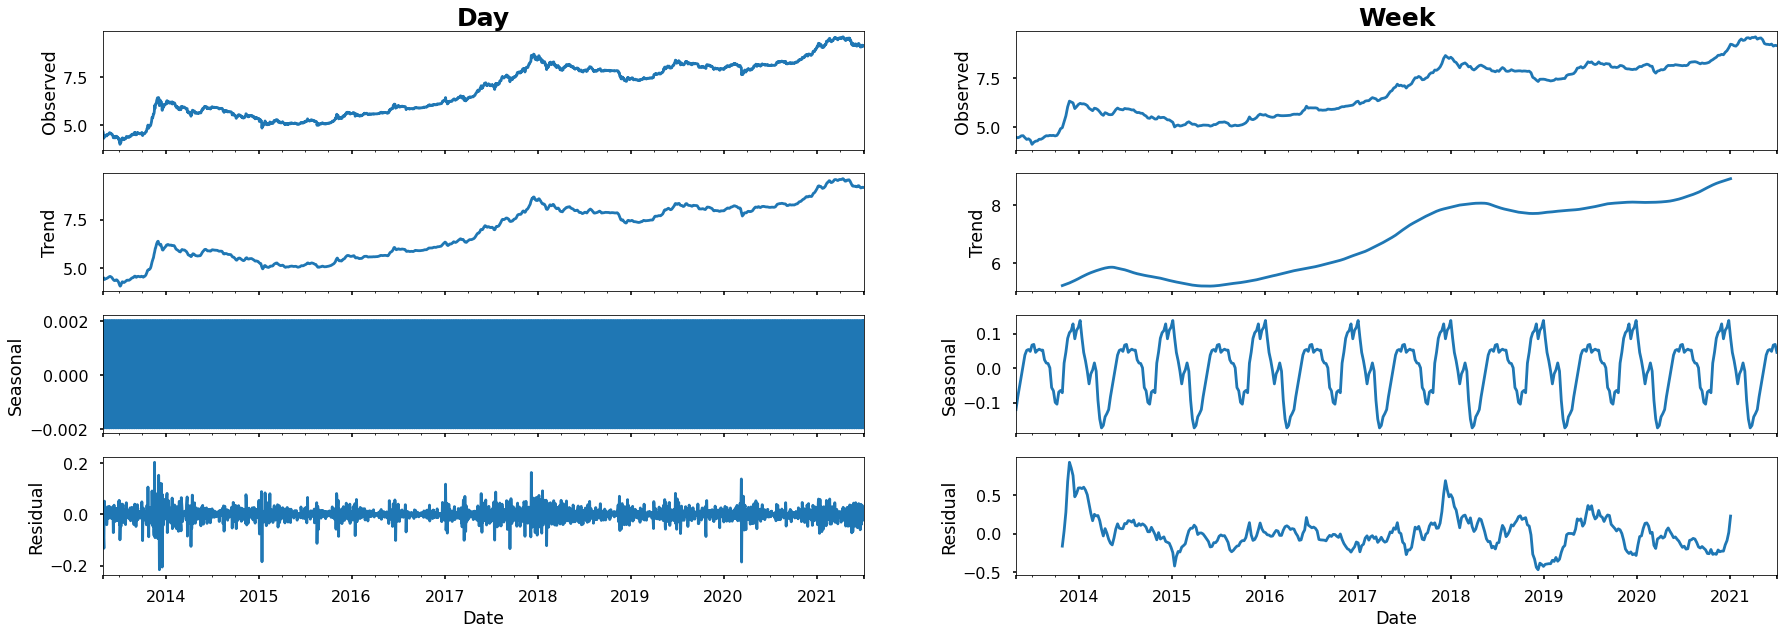

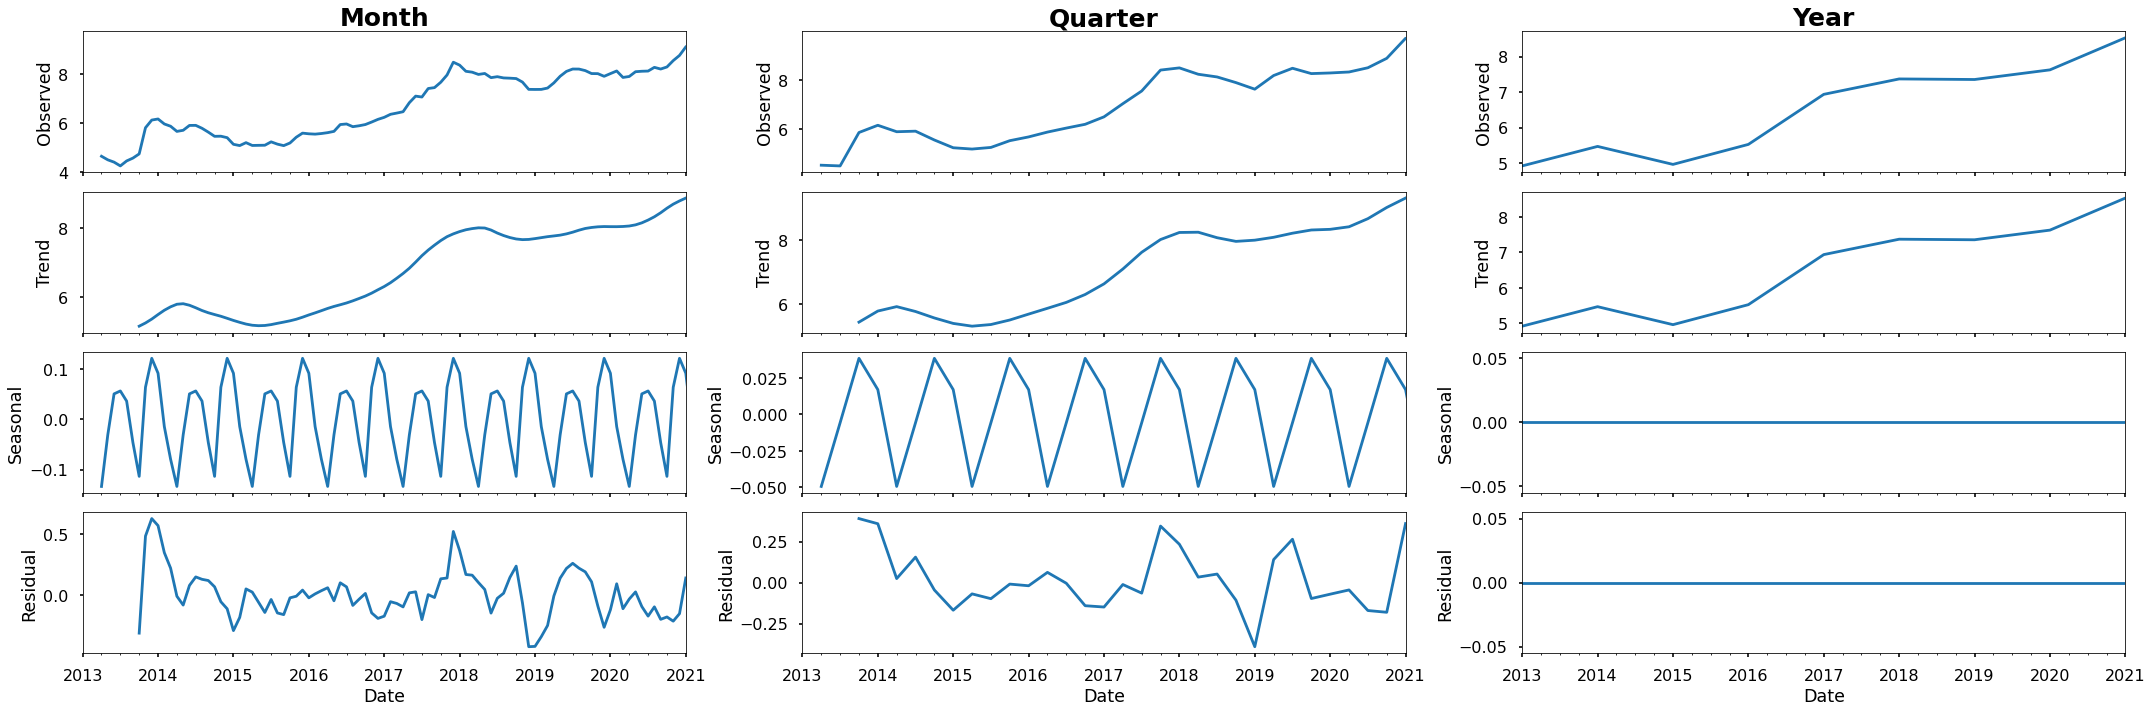

In [11]:
res_day = sm.tsa.seasonal_decompose(df_day['Close_box'])
res_week = sm.tsa.seasonal_decompose(df_week['Close_box'])
res_month = sm.tsa.seasonal_decompose(df_month['Close_box'])
res_quarter = sm.tsa.seasonal_decompose(df_quarter['Close_box'])
res_year = sm.tsa.seasonal_decompose(df_year['Close_box'])

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(30,10))
plotseasonal(res_day, axes[:,0],'Day')
plotseasonal(res_week, axes[:,1],'Week')


fig, axes = plt.subplots(ncols=3, nrows=4, sharex=True, figsize=(30,10))
plotseasonal(res_month, axes[:,0],'Month')
plotseasonal(res_quarter, axes[:,1],'Quarter')
plotseasonal(res_year, axes[:,2],'Year')

plt.tight_layout()
plt.show()

## Dickey Fuller test

In [12]:
print("Dickey–Fuller test (Box-Cox - Day): p=%f" % sm.tsa.stattools.adfuller(df_day['Close_box'])[1])
print("Dickey–Fuller test (Box-Cox - Week): p=%f" % sm.tsa.stattools.adfuller(df_week['Close_box'])[1])
print("Dickey–Fuller test (Box-Cox - Month): p=%f" % sm.tsa.stattools.adfuller(df_month['Close_box'])[1])
print("Dickey–Fuller test (Box-Cox - Quarter): p=%f" % sm.tsa.stattools.adfuller(df_quarter['Close_box'])[1])
print("Dickey–Fuller test (Box-Cox - Year): p=%f" % sm.tsa.stattools.adfuller(df_year['Close_box'])[1])

Dickey–Fuller test (Box-Cox - Day): p=0.801816
Dickey–Fuller test (Box-Cox - Week): p=0.771178
Dickey–Fuller test (Box-Cox - Month): p=0.699045
Dickey–Fuller test (Box-Cox - Quarter): p=0.576303
Dickey–Fuller test (Box-Cox - Year): p=0.772739


# **Seasonal differencing**

In [13]:
df_day['Close_box_season_diff'] = df_day.Close_box - df_day.Close_box.shift(12)
df_week['Close_box_season_diff'] = df_week.Close_box - df_week.Close_box.shift(12)
df_month['Close_box_season_diff'] = df_month.Close_box - df_month.Close_box.shift(12)
df_quarter['Close_box_season_diff'] = df_quarter.Close_box - df_quarter.Close_box.shift(12)
# Year : Sample size is too short to use selected regression component.

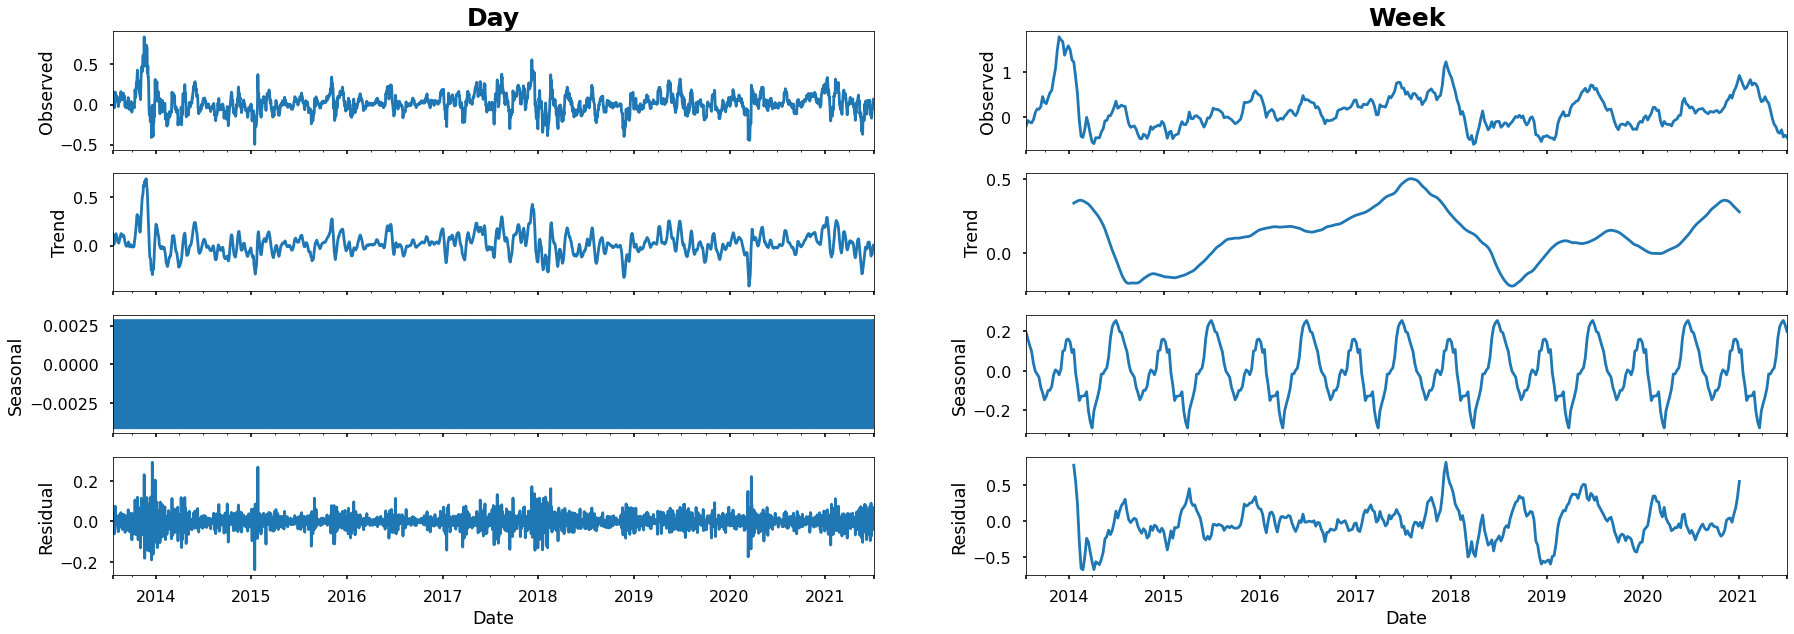

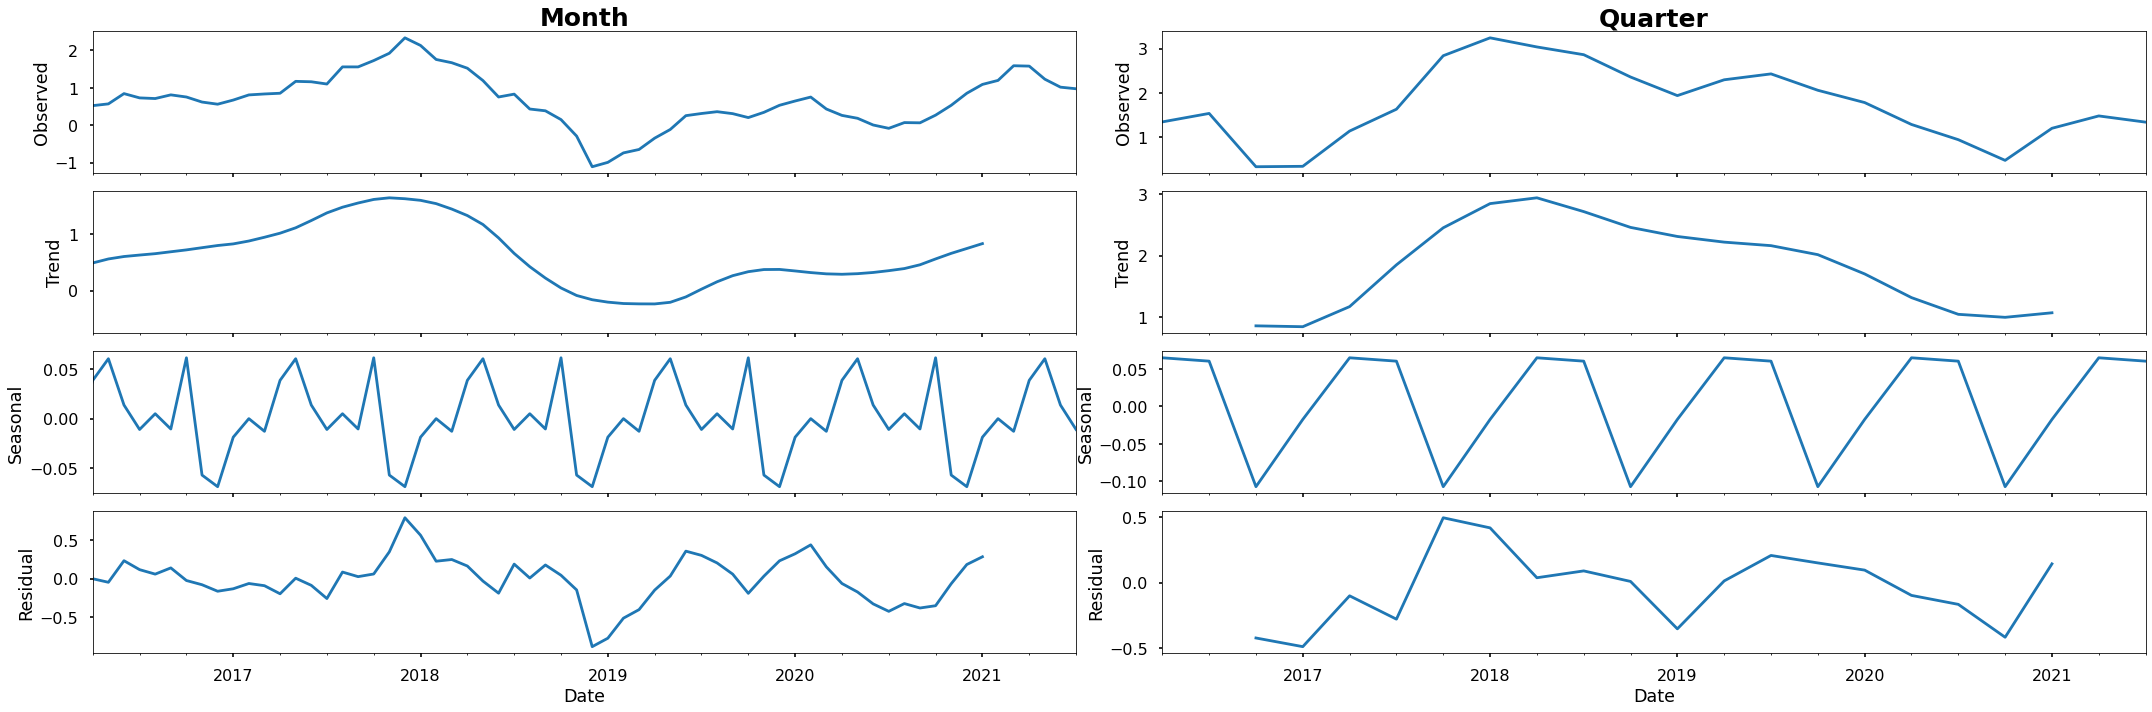

In [14]:
res_day = sm.tsa.seasonal_decompose(df_day['Close_box_season_diff'][12:])
res_week = sm.tsa.seasonal_decompose(df_week['Close_box_season_diff'][12:])
res_month = sm.tsa.seasonal_decompose(df_month['Close_box_season_diff'][12:])
res_quarter = sm.tsa.seasonal_decompose(df_quarter['Close_box_season_diff'][12:])

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(30,10))
plotseasonal(res_day, axes[:,0],'Day')
plotseasonal(res_week, axes[:,1],'Week')


fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(30,10))
plotseasonal(res_month, axes[:,0],'Month')
plotseasonal(res_quarter, axes[:,1],'Quarter')

plt.tight_layout()
plt.show()

## Dickey Fuller test

In [15]:
print("Dickey–Fuller test (Seasonal Differencing - Day): p=%f" % sm.tsa.stattools.adfuller(df_day['Close_box_season_diff'][12:])[1])
print("Dickey–Fuller test (Seasonal Differencing - Week): p=%f" % sm.tsa.stattools.adfuller(df_week['Close_box_season_diff'][12:])[1])
print("Dickey–Fuller test (Seasonal Differencing - Month): p=%f" % sm.tsa.stattools.adfuller(df_month['Close_box_season_diff'][12:])[1])
print("Dickey–Fuller test (Seasonal Differencing - Quarter): p=%f" % sm.tsa.stattools.adfuller(df_quarter['Close_box_season_diff'][12:])[1])

Dickey–Fuller test (Seasonal Differencing - Day): p=0.000000
Dickey–Fuller test (Seasonal Differencing - Week): p=0.003818
Dickey–Fuller test (Seasonal Differencing - Month): p=0.505127
Dickey–Fuller test (Seasonal Differencing - Quarter): p=0.525992


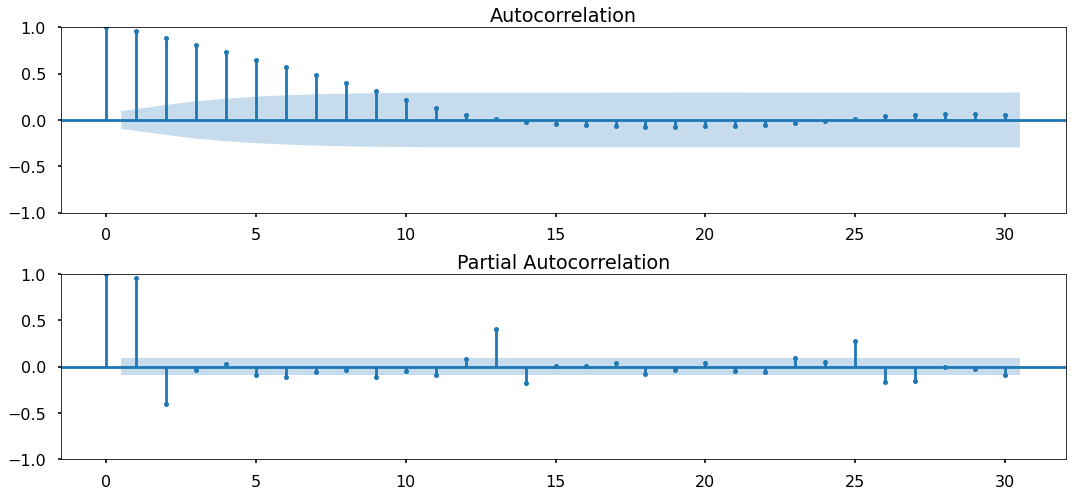

In [16]:
# ACF and PACF
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_week['Close_box_season_diff'][13:].values.squeeze(), lags=30, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_week['Close_box_season_diff'][13:].values.squeeze(), lags=30, ax=ax)
plt.tight_layout()
plt.show()

# **Regular differencing**

In [17]:
df_day['Close_box_diff'] = df_day['Close_box'] - df_day['Close_box'].shift(1)
df_week['Close_box_diff'] = df_week['Close_box'] - df_week['Close_box'].shift(1)
df_month['Close_box_diff'] = df_month['Close_box'] - df_month['Close_box'].shift(1)
df_quarter['Close_box_diff'] = df_quarter['Close_box'] - df_quarter['Close_box'].shift(1)
df_year['Close_box_diff'] = df_year['Close_box'] - df_year['Close_box'].shift(1)

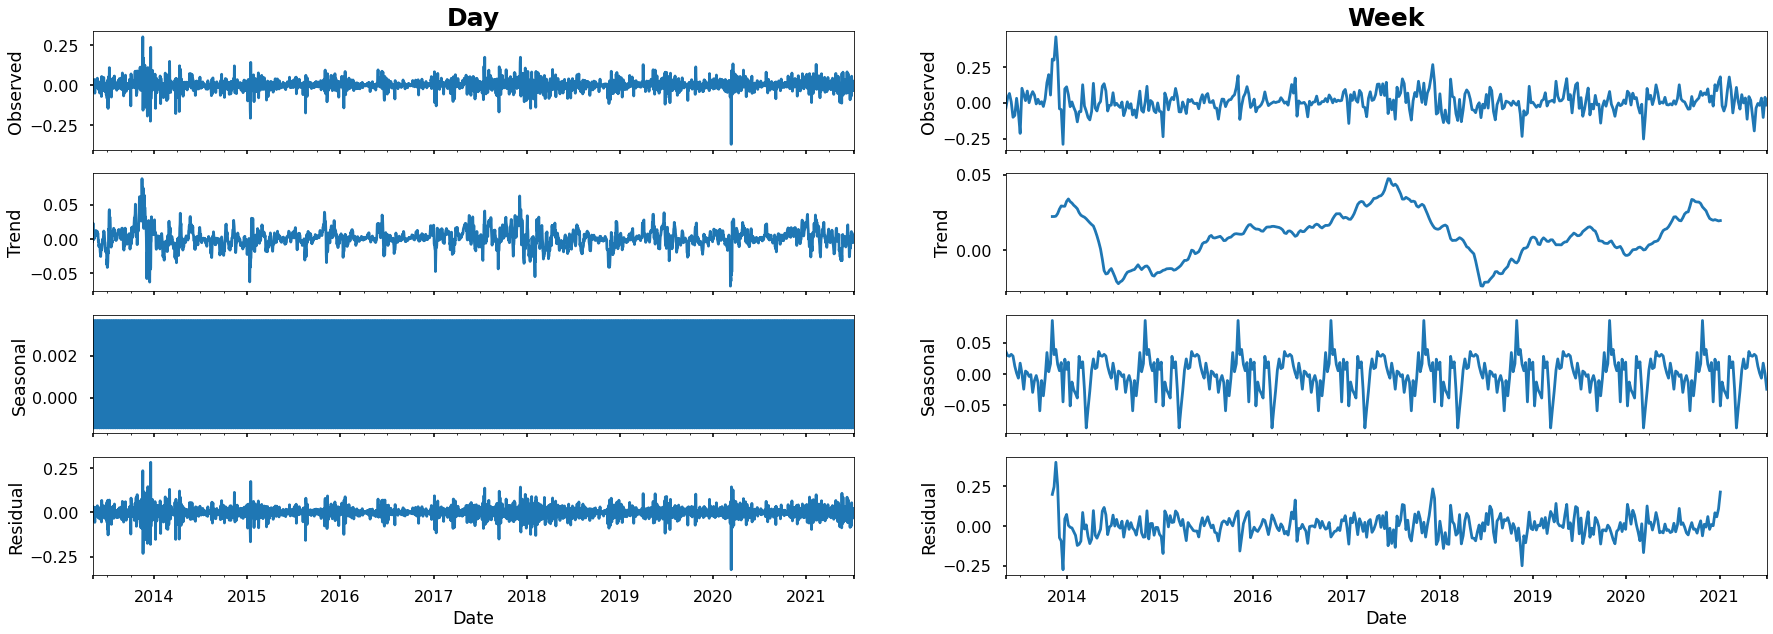

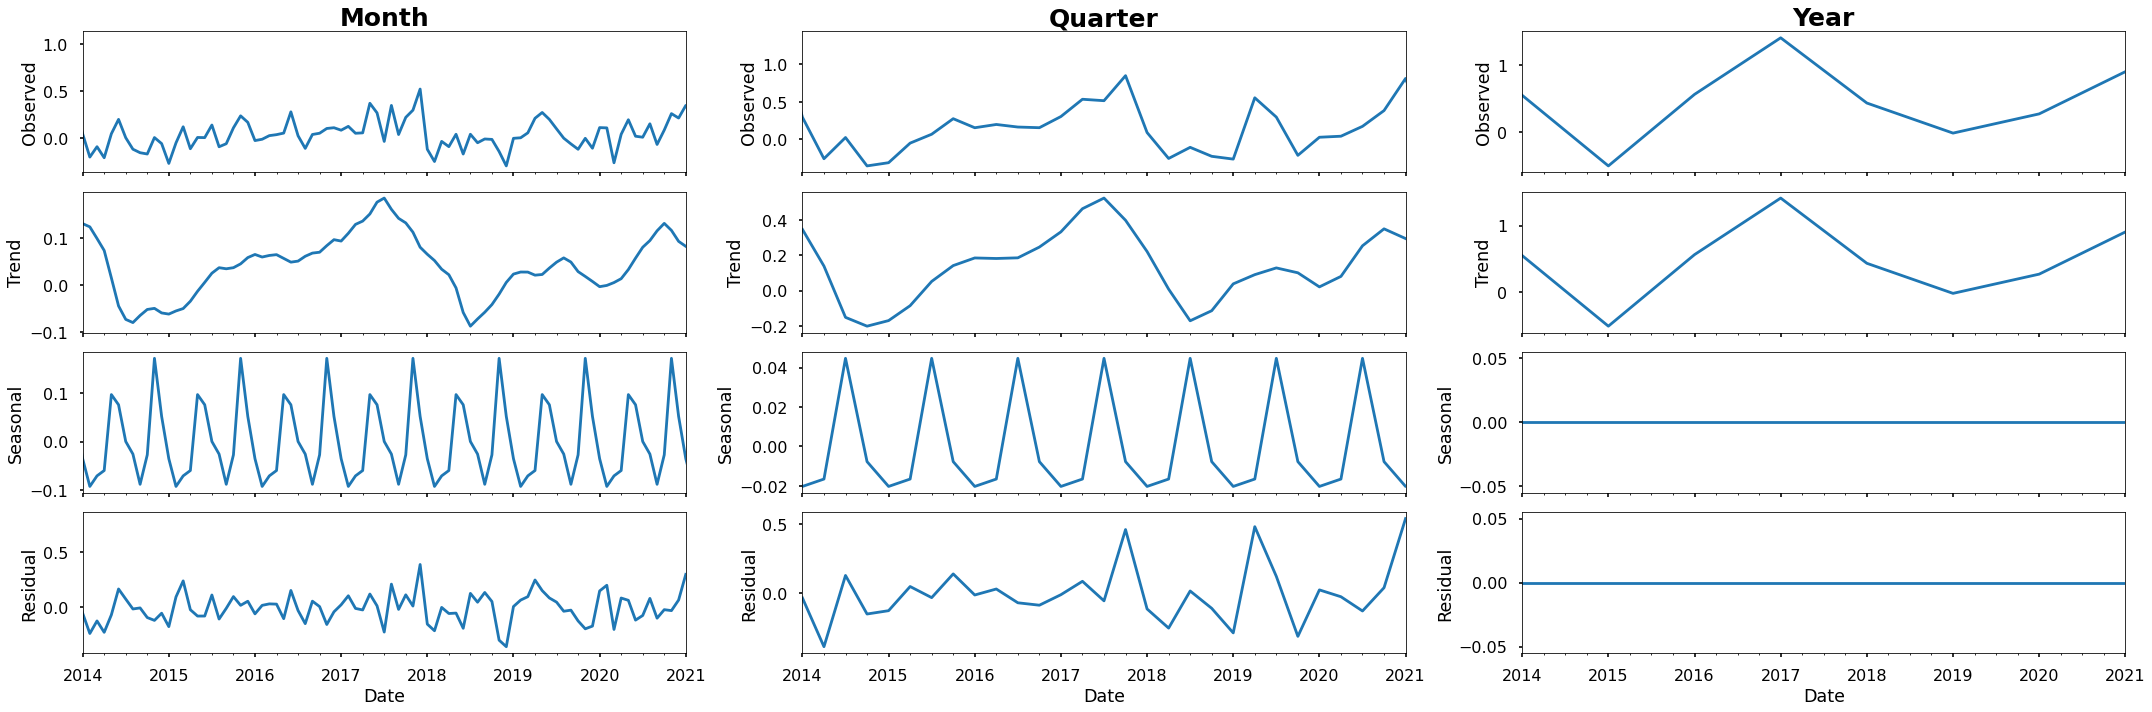

In [18]:
res_day = sm.tsa.seasonal_decompose(df_day['Close_box_diff'][1:])
res_week = sm.tsa.seasonal_decompose(df_week['Close_box_diff'][1:])
res_month = sm.tsa.seasonal_decompose(df_month['Close_box_diff'][1:])
res_quarter = sm.tsa.seasonal_decompose(df_quarter['Close_box_diff'][1:])
res_year = sm.tsa.seasonal_decompose(df_year['Close_box_diff'][1:])

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(30,10))
plotseasonal(res_day, axes[:,0],'Day')
plotseasonal(res_week, axes[:,1],'Week')

fig, axes = plt.subplots(ncols=3, nrows=4, sharex=True, figsize=(30,10))
plotseasonal(res_month, axes[:,0],'Month')
plotseasonal(res_quarter, axes[:,1],'Quarter')
plotseasonal(res_year, axes[:,2],'Year')

plt.tight_layout()
plt.show()

In [19]:
print("Dickey–Fuller test (Differencing 1 - Day): p=%f" % sm.tsa.stattools.adfuller(df_day['Close_box_diff'][1:])[1])
print("Dickey–Fuller test (Differencing 1 - Week): p=%f" % sm.tsa.stattools.adfuller(df_week['Close_box_diff'][1:])[1])
print("Dickey–Fuller test (Differencing 1 - Month): p=%f" % sm.tsa.stattools.adfuller(df_month['Close_box_diff'][1:])[1])
print("Dickey–Fuller test (Differencing 1 - Quarter): p=%f" % sm.tsa.stattools.adfuller(df_quarter['Close_box_diff'][1:])[1])
print("Dickey–Fuller test (Differencing 1 - Year): p=%f" % sm.tsa.stattools.adfuller(df_year['Close_box_diff'][1:])[1])

Dickey–Fuller test (Differencing 1 - Day): p=0.000000
Dickey–Fuller test (Differencing 1 - Week): p=0.000000
Dickey–Fuller test (Differencing 1 - Month): p=0.000000
Dickey–Fuller test (Differencing 1 - Quarter): p=0.002951
Dickey–Fuller test (Differencing 1 - Year): p=0.000000


# **Regular differencing 2**

In [20]:
df_day['Close_box_diff2'] = df_day['Close_box_diff'] - df_day['Close_box_diff'].shift(1)
df_week['Close_box_diff2'] = df_week['Close_box_diff'] - df_week['Close_box_diff'].shift(1)
df_month['Close_box_diff2'] = df_month['Close_box_diff'] - df_month['Close_box_diff'].shift(1)
df_quarter['Close_box_diff2'] = df_quarter['Close_box_diff'] - df_quarter['Close_box_diff'].shift(1)
df_year['Close_box_diff2'] = df_year['Close_box_diff'] - df_year['Close_box_diff'].shift(1)

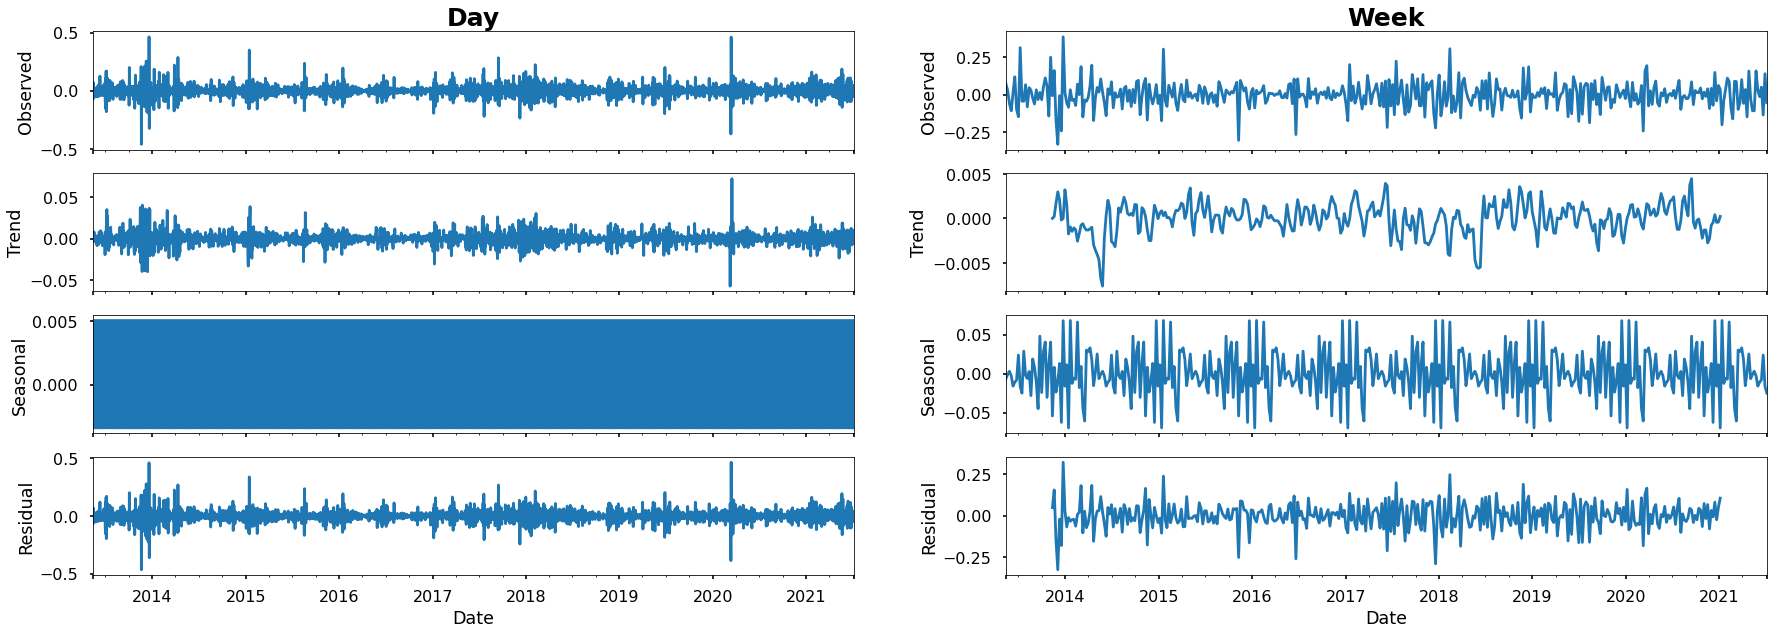

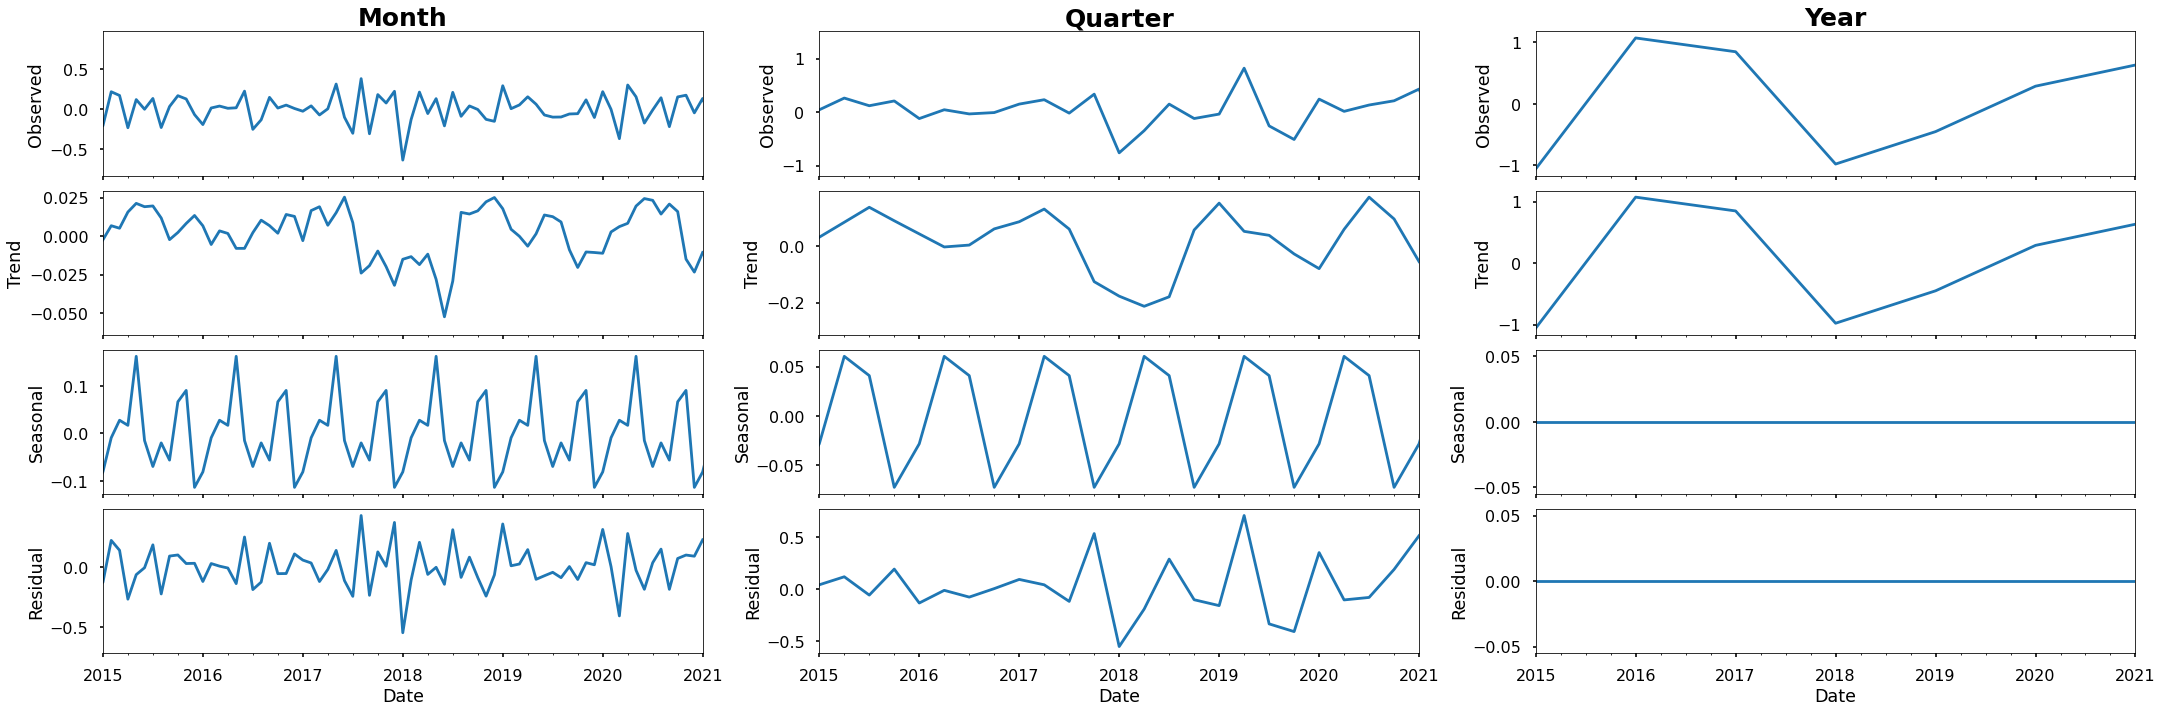

In [21]:
res_day = sm.tsa.seasonal_decompose(df_day['Close_box_diff2'][2:])
res_week = sm.tsa.seasonal_decompose(df_week['Close_box_diff2'][2:])
res_month = sm.tsa.seasonal_decompose(df_month['Close_box_diff2'][2:])
res_quarter = sm.tsa.seasonal_decompose(df_quarter['Close_box_diff2'][2:])
res_year = sm.tsa.seasonal_decompose(df_year['Close_box_diff2'][2:])

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(30,10))
plotseasonal(res_day, axes[:,0],'Day')
plotseasonal(res_week, axes[:,1],'Week')

fig, axes = plt.subplots(ncols=3, nrows=4, sharex=True, figsize=(30,10))
plotseasonal(res_month, axes[:,0],'Month')
plotseasonal(res_quarter, axes[:,1],'Quarter')
plotseasonal(res_year, axes[:,2],'Year')

plt.tight_layout()
plt.show()

In [22]:
print("Dickey–Fuller test (Differencing 2 - Day): p=%f" % sm.tsa.stattools.adfuller(df_day['Close_box_diff2'][2:])[1])
print("Dickey–Fuller test (Differencing 2 - Week): p=%f" % sm.tsa.stattools.adfuller(df_week['Close_box_diff2'][2:])[1])
print("Dickey–Fuller test (Differencing 2 - Month): p=%f" % sm.tsa.stattools.adfuller(df_month['Close_box_diff2'][2:])[1])
print("Dickey–Fuller test (Differencing 2 - Quarter): p=%f" % sm.tsa.stattools.adfuller(df_quarter['Close_box_diff2'][2:])[1])
print("Dickey–Fuller test (Differencing 2 - Year): p=%f" % sm.tsa.stattools.adfuller(df_year['Close_box_diff2'][2:])[1])

Dickey–Fuller test (Differencing 2 - Day): p=0.000000
Dickey–Fuller test (Differencing 2 - Week): p=0.000000
Dickey–Fuller test (Differencing 2 - Month): p=0.000000
Dickey–Fuller test (Differencing 2 - Quarter): p=0.000152
Dickey–Fuller test (Differencing 2 - Year): p=0.000050


# MAPE

In [23]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Auto ARIMA

Only df_week.Close_box_season_diff is stationary so we use autoarima to forecast it 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=136.509, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=132.979, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=138.961, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=130.567, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=131.422, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.367 seconds
RMSE: 31298.517868856252       Relative/Normalized RMSE: 128.58530596418984%       MAPE: 76.39904099190338


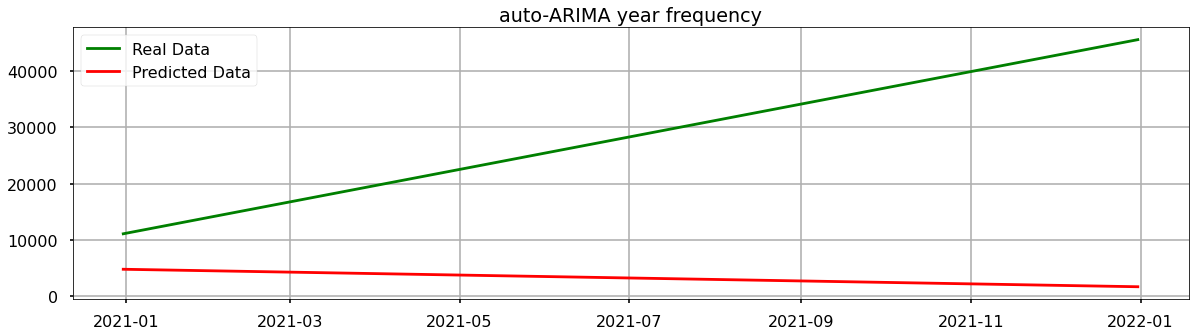

In [35]:
training_percentage = 0.80

data = df_year[['Close']]
data = data.interpolate(method="backfill")

#divide into train and validation set
train = data[:int(training_percentage*(len(data)))]
valid = data[int(training_percentage*(len(data))):]

#building the model
from pmdarima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

# Error calculation
# RMSE
rmse = sqrt(mean_squared_error(valid.iloc[:,0], forecast.iloc[:,0]))
relative_rmse = sqrt(mean_squared_error(valid.iloc[:,0], forecast.iloc[:,0]))/valid.iloc[:,0].std()

# MAPE
mape = mean_absolute_percentage_error(valid.iloc[:,0],forecast.iloc[:,0])

print(f'RMSE: {rmse} \
      Relative/Normalized RMSE: {relative_rmse*100}% \
      MAPE: {mape}')

# Plot the predictions for validation set
plt.figure(figsize=(20, 5))
plt.title(f"auto-ARIMA year frequency")
plt.plot(valid, label='Real Data', color='green')
plt.plot(forecast, label='Predicted Data', color='red')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# **SARIMAX**

## Choosing the best SARIMAX model based on AIC

In [135]:
training_percentage = 0.80

#df_day[['Close_box_season_diff']][12:]
#df_week[['Close_box_season_diff']][12:]
#df_day[['Close_box_diff']][1:]
#df_week[['Close_box_diff']][1:]
#df_month[['Close_box_diff']][1:]
#df_quarter[['Close_box_diff']][1:]
#df_year[['Close_box_diff']][1:]

data = df_day[['Close_box_season_diff']][12:]
data = data.interpolate(method="backfill")

#Dividing into training and testing set
train = data[:int(training_percentage*(len(data)))]
test = data[int(training_percentage*(len(data))):]

# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Best Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(train, 
                                        order = (param[0],d,param[1]),
                                        #order = (ps,d,qs)
                                        seasonal_order = (param[2],D,param[3],52)).fit(disp=-1)  
                                        #seasonal_order=(Ps,D,Qs)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

# Best Model
print(best_model.summary())

      parameters          aic
37  (2, 0, 0, 1) -7115.824031
13  (0, 2, 0, 1) -7115.417623
39  (2, 0, 1, 1) -7114.996307
15  (0, 2, 1, 1) -7114.590105
43  (2, 1, 0, 1) -7113.821002
                                      SARIMAX Results                                       
Dep. Variable:                Close_box_season_diff   No. Observations:                 2383
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 52)   Log Likelihood                3561.912
Date:                              Mon, 10 Jan 2022   AIC                          -7115.824
Time:                                      19:07:13   BIC                          -7092.810
Sample:                                  05-11-2013   HQIC                         -7107.439
                                       - 11-18-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.97

## STL-decomposition and ACF

Dickey–Fuller test: p=0.000000


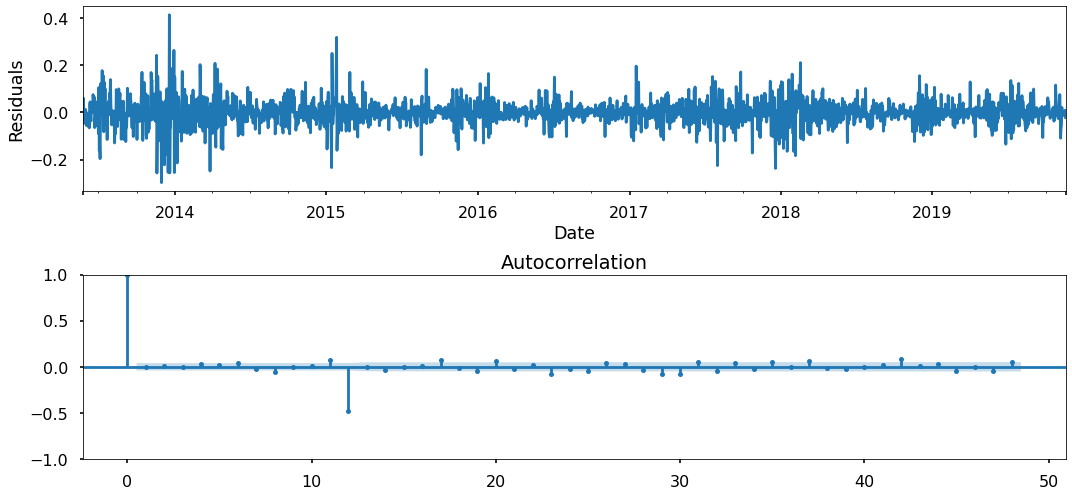

In [136]:
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

## Prediction

In [137]:
test_df = test
test_df['pred_box_diff'] = best_model.predict(start=len(train), end=len(train)+len(test))
test_df

,Close_box_season_diff,pred_box_diff
Date,,
2019-11-19,-0.096287,-0.103381
2019-11-20,-0.073261,-0.096730
2019-11-21,-0.113007,-0.098850
2019-11-22,-0.171270,-0.099797
2019-11-23,-0.133866,-0.107333
...,...,...
2021-07-02,-0.039550,-0.075139
2021-07-03,0.069028,-0.089302
2021-07-04,0.062775,-0.092739


In [143]:
#Inverse diff
test_df['pred_box'] = df_day['Close_box'][int(training_percentage*(len(data))):] + test_df['pred_box_diff'].cumsum()
test_df['pred_box']

Date
2019-11-19     7.939606
2019-11-20     7.825398
2019-11-21     7.687583
2019-11-22     7.550947
2019-11-23     7.454568
                ...    
2021-07-02   -39.796071
2021-07-03   -39.868175
2021-07-04   -39.947392
2021-07-05   -40.071054
2021-07-06   -40.146403
Freq: D, Name: pred_box, Length: 596, dtype: float64

In [145]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

In [146]:
test_df['prediction'] = invboxcox(test_df['pred_box'],lmbda)
test_df

,Close_box_season_diff,pred_box_diff,pred_box,prediction
Date,,,,
2019-11-19,-0.096287,-0.103381,7.939606,1.787263e+04
2019-11-20,-0.073261,-0.096730,7.825398,1.499204e+04
2019-11-21,-0.113007,-0.098850,7.687583,1.214908e+04
2019-11-22,-0.171270,-0.099797,7.550947,9.881924e+03
2019-11-23,-0.133866,-0.107333,7.454568,8.551835e+03
...,...,...,...,...
2021-07-02,-0.039550,-0.075139,-39.796071,1.114133e-10
2021-07-03,0.069028,-0.089302,-39.868175,1.085501e-10
2021-07-04,0.062775,-0.092739,-39.947392,1.054928e-10


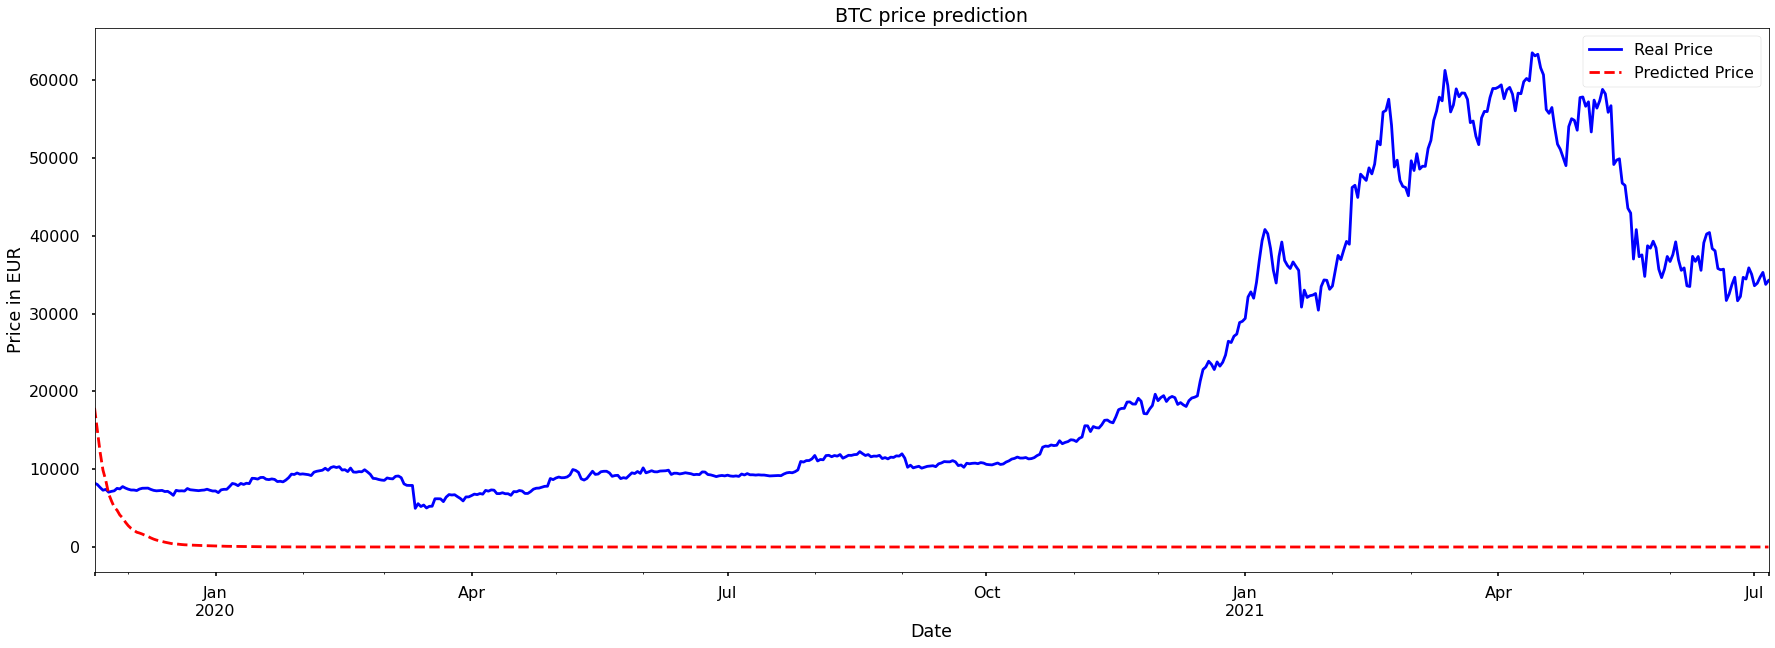

RMSE: 27786.028546646252       Relative/Normalized RMSE: 158.99402056236858%       MAPE: 98.30769101104052


In [150]:
real = df_day['Close'][int(training_percentage*(len(data)))+1:]

#Plot real values
plt.figure(figsize=(30,10))
real.plot(color='b', ls='solid', label='Real Price')

#Plot prediction values
test_df['prediction'].plot(color='r', ls='--', label='Predicted Price')
plt.legend()
plt.title('BTC price prediction')
plt.ylabel('Price in EUR')
plt.show()

# RMSE
rmse = sqrt(mean_squared_error(real, test_df['prediction']))
relative_rmse = sqrt(mean_squared_error(real, test_df['prediction']))/real.std()

# MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(real,test_df['prediction'])

print(f'RMSE: {rmse} \
      Relative/Normalized RMSE: {relative_rmse*100}% \
      MAPE: {mape}')